#### Practical 3: Develop a sentiment analysis model to analyze customer reviews of products or services.
#### Dataset: IMDB Movie 
#### Name: Pawar Sneha Sachin
#### Roll No: 24207148
#### Class: TY-A  Batch: C

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [56]:
data = pd.read_csv("IMDB Dataset.csv")
print(data.head(10))

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive
5  Probably my all-time favorite movie, a story o...  positive
6  I sure would like to see a resurrection of a u...  positive
7  This show was an amazing, fresh & innovative i...  negative
8  Encouraged by the positive comments about this...  negative
9  If you like original gut wrenching laughter yo...  positive


### PreProcessing

In [59]:
data.shape

(50000, 2)

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [63]:
data['sentiment'].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

In [65]:
data.isnull().sum()

review       0
sentiment    0
dtype: int64

### Text Preprocessing

In [68]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'<.*?>', '', text)      # remove HTML tags
    text = re.sub(r'[^a-zA-Z]', ' ', text) # remove special characters
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    return text

data['review'] = data['review'].apply(clean_text)

In [69]:
#data.pairplot() Encode Target Labels

data['sentiment'] = data['sentiment'].map({ 'positive': 1,'negative': 0 })

In [70]:
#Train-Test Split

X = data['review']
y = data['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### TF-IDF Vectorization

In [72]:
tfidf = TfidfVectorizer(
    stop_words='english',  # remove common words
    max_features=5000)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [73]:
tfidf

TfidfVectorizer(max_features=5000, stop_words='english')

In [74]:
#Train Sentiment Classifier

model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

LogisticRegression()

In [75]:
# Model Evaluation

y_pred = model.predict(X_test_tfidf)

In [76]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8893


In [77]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.87      0.89      4961
           1       0.88      0.91      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [78]:
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Confusion Matrix:
 [[4328  633]
 [ 474 4565]]


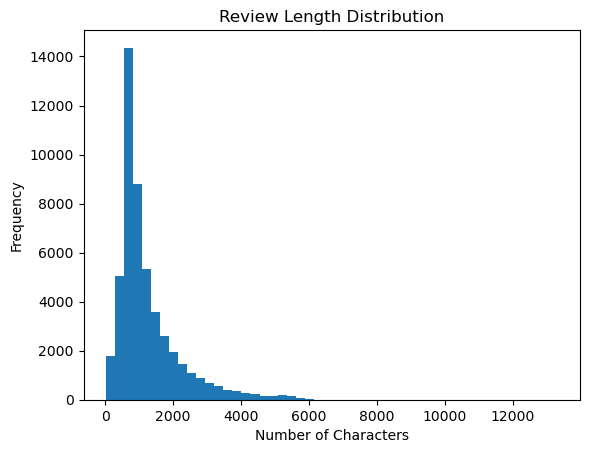

In [79]:
# Create review length column
data['review_length'] = data['review'].apply(len)

plt.figure()
plt.hist(data['review_length'], bins=50)
plt.xlabel("Number of Characters")
plt.ylabel("Frequency")
plt.title("Review Length Distribution")
plt.show()


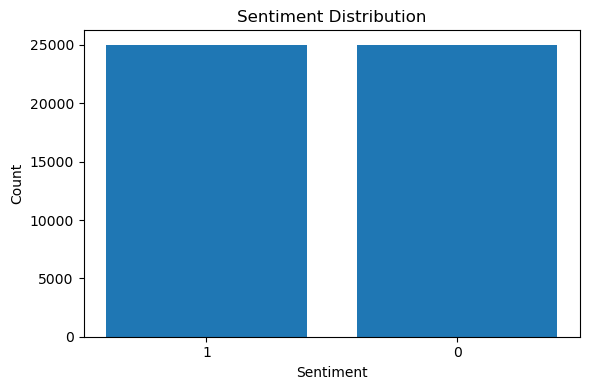

In [80]:
sentiments = data['sentiment'].value_counts()

plt.figure(figsize=(6,4))
plt.bar(sentiments.index.astype(str), sentiments.values)
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.title("Sentiment Distribution")
plt.tight_layout()
plt.show()

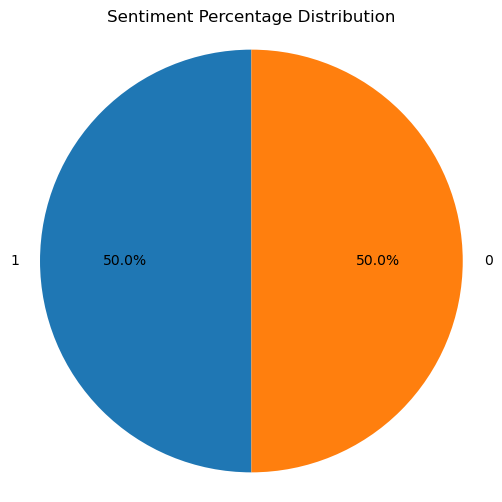

In [81]:
# Count sentiments
counts = data['sentiment'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(counts.values,
        labels=counts.index,
        autopct='%1.1f%%',
        startangle=90)

plt.title("Sentiment Percentage Distribution")
plt.axis('equal')   # makes circle perfect
plt.show()

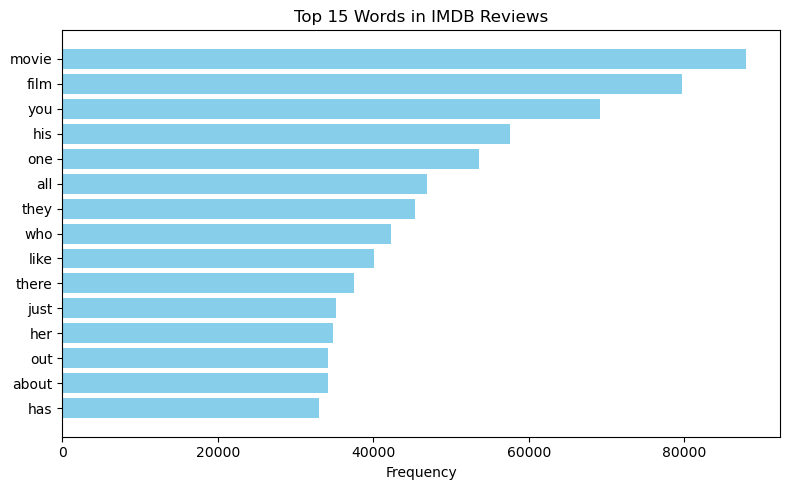

In [82]:
from collections import Counter
text = " ".join(data['review'].astype(str)).lower().split()
stopwords = {'the','and','is','in','to','of','a','it','that','this','for','with',
             'as','was','but','be','on','are','have','at','by','an','not','from'}

# Count top 15 words
freq = Counter(w for w in text if w not in stopwords and len(w) > 2)
common = freq.most_common(15)

# Horizontal bar plot (easier to see)
words = [w[0] for w in common]
counts = [w[1] for w in common]

plt.figure(figsize=(8,5))
plt.barh(words[::-1], counts[::-1], color='skyblue')  # reverse for top-down
plt.xlabel("Frequency")
plt.title("Top 15 Words in IMDB Reviews")
plt.tight_layout()
plt.show()


In [83]:
def predict_sentiment(review):
    review = clean_text(review)
    vector = tfidf.transform([review])
    prediction = model.predict(vector)
    return "Positive" if prediction[0] == 1 else "Negative"

print(predict_sentiment("This product is amazing and very useful"))
print(predict_sentiment("Worst service ever, totally disappointed"))

Positive
Negative
